<a href="https://colab.research.google.com/github/Rambimo/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


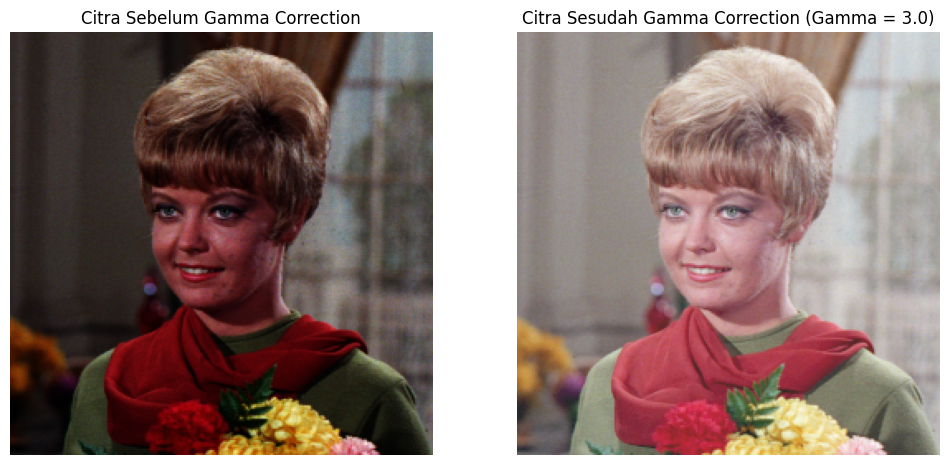

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print('Gamma Correction pada citra')
print('----------------------------------')

# Meminta masukan nilai gamma dari pengguna
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a valid number')
    exit()

# Memuat citra
image = cv2.imread('/content/drive/MyDrive/PCVK/female.tiff')  # Ganti 'nama_file_citra_anda.jpg' dengan nama file citra Anda

if image is None:
    print('Citra tidak dapat dimuat. Pastikan file citra ada di direktori yang sama dengan script ini.')
    exit()

# Melakukan gamma correction
gamma_corrected = np.power(image/255.0, 1.0 / gamma)
gamma_corrected = np.uint8(gamma_corrected * 255.0)

# Menampilkan perbandingan citra sebelum dan sesudah gamma correction
plt.figure(figsize=(12, 6))

# Citra sebelum gamma correction
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Citra Sebelum Gamma Correction')

# Citra sesudah gamma correction
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Citra Sesudah Gamma Correction (Gamma = {gamma})')

plt.show()

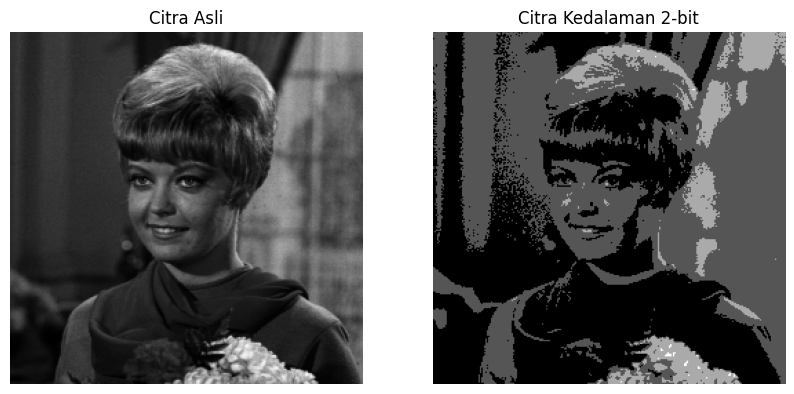

In [29]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Mengatur nilai bit kedalaman
bit_depth = 2
levels = pow(2, bit_depth) - 1

# Membaca citra masukan dalam mode grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)

# Kuantisasi citra sesuai dengan bit kedalaman
depth_image = np.zeros(original.shape, original.dtype)

# Kuantisasi citra sesuai dengan bit kedalaman
for i in range(original.shape[0]):
  for j in range(original.shape[1]):
    quantized_value = round((original[i, j] / 255) * levels) * (255 / levels)
    depth_image[i, j] = quantized_value

# Menampilkan citra asli dan citra hasil kuantisasi secara sejajar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title(f'Citra Kedalaman {bit_depth}-bit')
plt.axis('off')

plt.show()

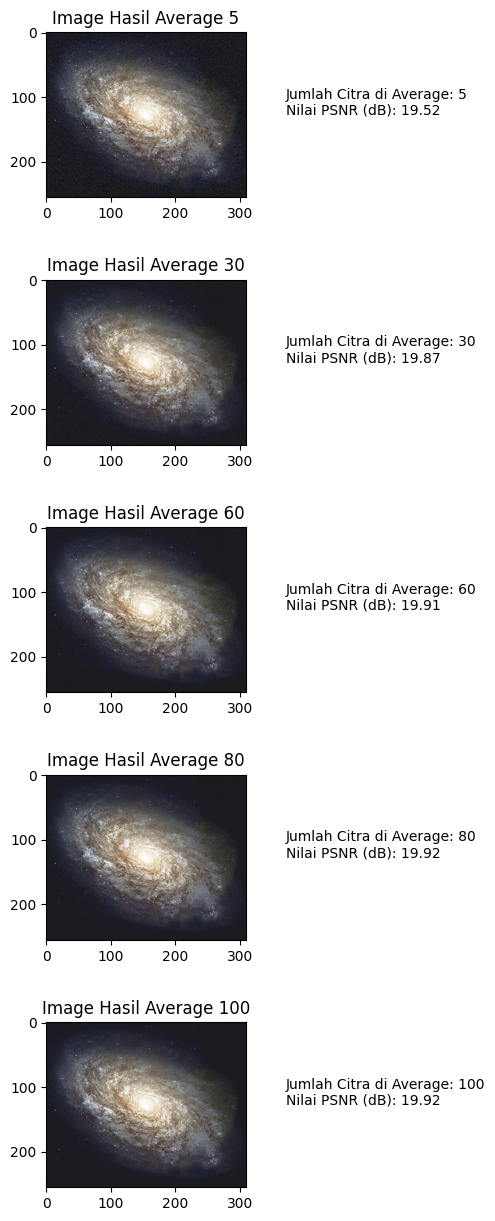

In [44]:
# Import library yang dibutuhkan
import cv2 as cv
import numpy as np
import glob
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt

# Membaca citra asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Membaca semua citra dengan Gaussian Noise dari folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Fungsi untuk denoising rata-rata
def average_denoising(image_list):
    # Menghitung rata-rata citra-citra dengan Gaussian Noise
    average_image = np.zeros(image_list[0].shape, dtype=np.float32)
    for img in image_list:
        average_image += img / len(image_list)

    # Mengkonversi citra rata-rata ke tipe data yang benar
    average_image = average_image.astype(np.uint8)

    return average_image

# Menyiapkan tabel hasil PSNR dan citra hasil average
hasil_psnr = []

# Jumlah citra di Average Image
jumlah_citra_average_image = [5, 30, 60, 80, 100]

# Mencatat hasil PSNR dan citra hasil average
for jumlah_citra in jumlah_citra_average_image:
    # Memilih citra-citra dari cv_img sesuai jumlah_citra
    selected_images = cv_img[:jumlah_citra]

    # Menghilangkan noise dari citra-citra dengan Gaussian Noise
    denoised_image = average_denoising(selected_images)

    # Menghitung PSNR antara citra asli dan citra denoised
    psnr_value = peak_signal_noise_ratio(original_image, denoised_image)

    # Menambahkan hasil PSNR dan citra hasil average ke tabel
    hasil_psnr.append((jumlah_citra, psnr_value, denoised_image))

# Menampilkan tabel hasil PSNR dan citra hasil average dengan border
plt.figure(figsize=(10, 15))  # Increase figsize
for i, (jumlah_citra, psnr_value, avg_image) in enumerate(hasil_psnr):
    plt.subplot(len(hasil_psnr), 2, i * 2 + 1)  # 2 columns for image and info
    plt.imshow(cv.cvtColor(avg_image, cv.COLOR_BGR2RGB))
    plt.axis('on')
    plt.title(f'Image Hasil Average {jumlah_citra}')

    # Menampilkan informasi di sebelah kanan gambar
    info_text = f'Jumlah Citra di Average: {jumlah_citra}\nNilai PSNR (dB): {psnr_value:.2f}'
    plt.text(1.2, 0.5, info_text, fontsize=10, ha='left', transform=plt.gca().transAxes)

    # Add some space between images
    plt.subplots_adjust(hspace=0.5)

plt.show()

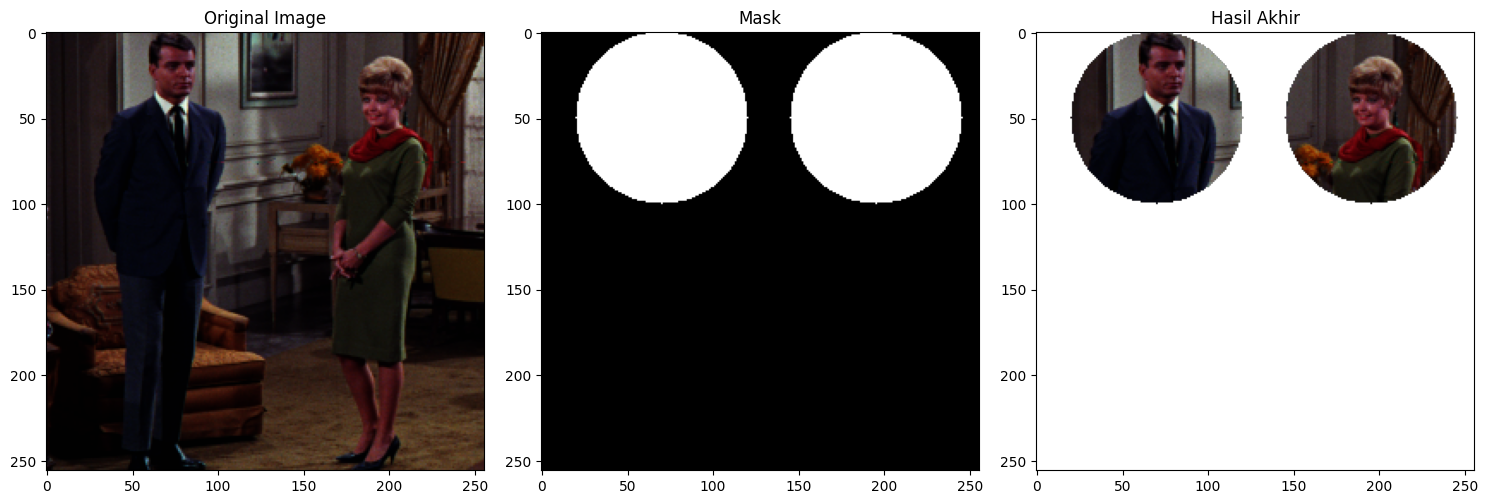

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/PCVK/couple.tiff'
original_image = cv.imread(image_path)

# Membuat maska dengan dua lingkaran putih
mask = np.zeros(original_image.shape[:2], dtype="uint8")
cv.circle(mask, (70, 50), 50, 255, -1)
cv.circle(mask, (195, 50), 50, 255, -1)

# Menggunakan operasi bitwise untuk mendapatkan bagian gambar yang ada di dalam maska
masked = cv.bitwise_and(original_image, original_image, mask=mask)

# Membuat saluran alpha
alpha = mask.copy()

# Memisahkan saluran warna Red, Green, Blue dari gambar asli
b, g, r = cv.split(masked)

# Menggunakan cv.merge() untuk menggabungkan keempat saluran ke dalam gambar RGBA
final = cv.merge((b, g, r, alpha))

# Menampilkan gambar samping-sampingan menggunakan matplotlib
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(131)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

# Maska
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

# Hasil akhir dengan latar belakang transparan
plt.subplot(133)
plt.imshow(cv.cvtColor(final, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

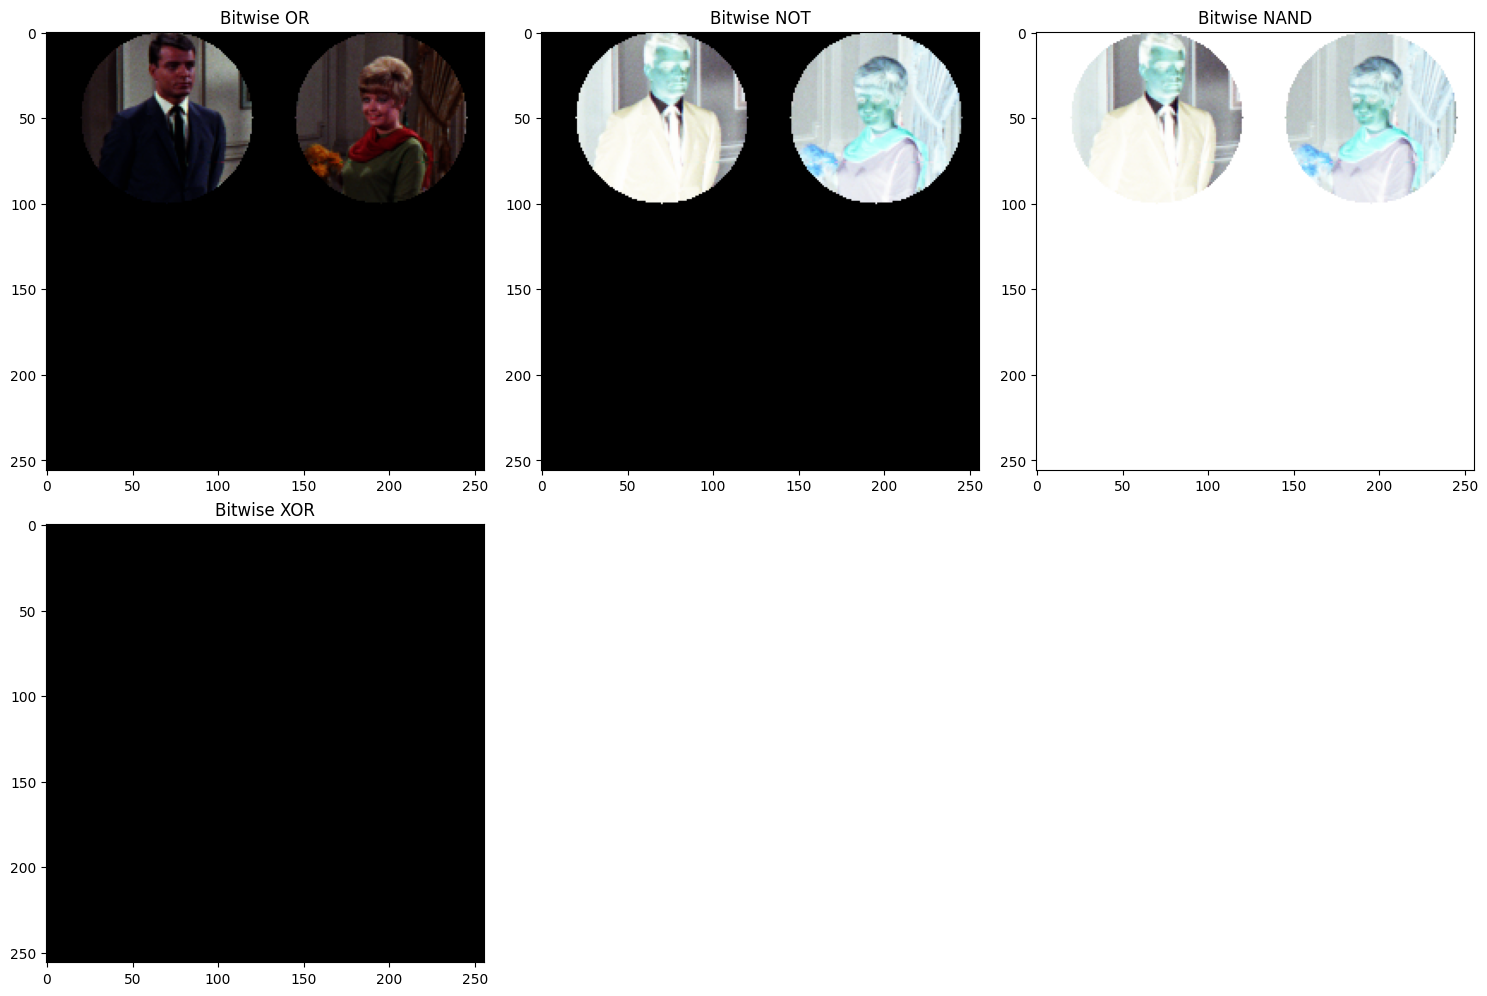

In [48]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/PCVK/couple.tiff'
original_image = cv.imread(image_path)

# Membuat maska dengan dua lingkaran putih
mask = np.zeros(original_image.shape[:2], dtype="uint8")
cv.circle(mask, (70, 50), 50, 255, -1)
cv.circle(mask, (195, 50), 50, 255, -1)

# Operasi bitwise OR
bitwise_or = original_image.copy()
bitwise_or[mask == 0] = [0, 0, 0]

# Operasi bitwise NOT
bitwise_not = cv.bitwise_not(original_image, mask=mask)

# Operasi bitwise NAND
bitwise_nand = cv.bitwise_not(cv.bitwise_and(original_image, original_image, mask=mask))

# Operasi bitwise XOR
bitwise_xor = cv.bitwise_xor(original_image, original_image, mask=mask)

# Menampilkan gambar samping-sampingan menggunakan matplotlib
plt.figure(figsize=(15, 10))

# Operasi bitwise OR
plt.subplot(231)
plt.imshow(cv.cvtColor(bitwise_or, cv.COLOR_BGR2RGB))
plt.title('Bitwise OR')
plt.axis('on')

# Operasi bitwise NOT
plt.subplot(232)
plt.imshow(cv.cvtColor(bitwise_not, cv.COLOR_BGR2RGB))
plt.title('Bitwise NOT')
plt.axis('on')

# Operasi bitwise NAND
plt.subplot(233)
plt.imshow(cv.cvtColor(bitwise_nand, cv.COLOR_BGR2RGB))
plt.title('Bitwise NAND')
plt.axis('on')

# Operasi bitwise XOR
plt.subplot(234)
plt.imshow(cv.cvtColor(bitwise_xor, cv.COLOR_BGR2RGB))
plt.title('Bitwise XOR')
plt.axis('on')

plt.tight_layout()
plt.show()